# Model creation

## Libs

In [1]:
from prepareRSSI import RssiDatas
import pandas as pd
import parameters as param
import numpy as np
import tensorflow as tf
#import intel-tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K # to set the learning rate

## Import the RSSI, mac and zones values

In [2]:
RSSI = RssiDatas()

rssi_tmp = np.genfromtxt(param.rssi_csv_output, delimiter=',')
# deleting index column and row :
rssi_tmp = np.delete(rssi_tmp, 0, 1)
RSSI.rssi = np.delete(rssi_tmp, 0, 0)

mac_tmp = np.genfromtxt(param.mac_csv_output, delimiter=',', dtype=str)
# deleting index column and row :
mac_tmp = mac_tmp[:,1] # keep only the column with the mac adresses
RSSI.mac = np.delete(mac_tmp, 0) # delete the first row because empty

zones_tmp = np.genfromtxt(param.zones_csv_output, delimiter=',')
# deleting index column and row :
zones_tmp = zones_tmp[:,1] # keep only the colomn with the zone ids
RSSI.zones = np.delete(zones_tmp, 0, 0) # delete the first row because empty

## Pre load datas into model

In [3]:
print("RSSI.rssi : ", np.shape(RSSI.rssi))
print("RSSI.zones : ", np.shape(RSSI.zones))
zonesNb = 7 # number of zones

# create the zone output array of vectors :
y_zones = np.zeros([np.size(RSSI.zones), zonesNb])
for i in range(np.size(RSSI.zones)):
    y_zones[i, int(RSSI.zones[i])] = 1

train_data, test_data, train_labels, test_labels = train_test_split(RSSI.rssi,y_zones)
print("train_data : ", np.shape(train_data))
print("train_labels : ", np.shape(train_labels))
print("test_data : ", np.shape(test_data))
print("test_labels : ", np.shape(test_labels))
# normalize the RSSI values from 0 to 1
train_data = train_data/(-95)
test_data = test_data/(-95)

RSSI.rssi :  (265, 128)
RSSI.zones :  (265,)
train_data :  (198, 128)
train_labels :  (198, 7)
test_data :  (67, 128)
test_labels :  (67, 7)


## Create the model

In [4]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dropout(param.dropout),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dropout(param.dropout),
  tf.keras.layers.Dense(np.size(RSSI.mac), activation='relu'),
  tf.keras.layers.Dropout(param.dropout),
  tf.keras.layers.Dense(7)
])

## Compile the model

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])
K.set_value(model.optimizer.learning_rate, param.learningRate)

## Train the model

In [6]:
history = model.fit(train_data, train_labels,
                    epochs=param.epochs,
                    validation_data=(test_data, test_labels))

Epoch 1/5000
7/7 [==============================] - 0s 17ms/step - loss: 0.5503 - accuracy: 0.0960 - val_loss: 0.2526 - val_accuracy: 0.0896
Epoch 2/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.4314 - accuracy: 0.1010 - val_loss: 0.1921 - val_accuracy: 0.0896
Epoch 3/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.3893 - accuracy: 0.1061 - val_loss: 0.1573 - val_accuracy: 0.0896
Epoch 4/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.3257 - accuracy: 0.1313 - val_loss: 0.1375 - val_accuracy: 0.0896
Epoch 5/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.2896 - accuracy: 0.1313 - val_loss: 0.1289 - val_accuracy: 0.0896
Epoch 6/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.2579 - accuracy: 0.1313 - val_loss: 0.1256 - val_accuracy: 0.2090
Epoch 7/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.2545 - accuracy: 0.1515 - val_loss: 0.1252 - val_accuracy: 0.1940
Epoch 8/5000
7/7 [=

7/7 [==============================] - 0s 3ms/step - loss: 0.1379 - accuracy: 0.2071 - val_loss: 0.1228 - val_accuracy: 0.2687
Epoch 60/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1391 - accuracy: 0.1515 - val_loss: 0.1228 - val_accuracy: 0.2537
Epoch 61/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1319 - accuracy: 0.2222 - val_loss: 0.1226 - val_accuracy: 0.2537
Epoch 62/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1358 - accuracy: 0.1667 - val_loss: 0.1223 - val_accuracy: 0.2537
Epoch 63/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1343 - accuracy: 0.1869 - val_loss: 0.1223 - val_accuracy: 0.2687
Epoch 64/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1320 - accuracy: 0.1919 - val_loss: 0.1220 - val_accuracy: 0.2687
Epoch 65/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1356 - accuracy: 0.2222 - val_loss: 0.1217 - val_accuracy: 0.2687
Epoch 66/5000
7/7 [========

7/7 [==============================] - 0s 3ms/step - loss: 0.1232 - accuracy: 0.2172 - val_loss: 0.1153 - val_accuracy: 0.3134
Epoch 118/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1213 - accuracy: 0.2626 - val_loss: 0.1150 - val_accuracy: 0.3433
Epoch 119/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1234 - accuracy: 0.2374 - val_loss: 0.1150 - val_accuracy: 0.3881
Epoch 120/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1232 - accuracy: 0.2374 - val_loss: 0.1155 - val_accuracy: 0.3433
Epoch 121/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1195 - accuracy: 0.2525 - val_loss: 0.1158 - val_accuracy: 0.3731
Epoch 122/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1236 - accuracy: 0.2677 - val_loss: 0.1158 - val_accuracy: 0.2687
Epoch 123/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1223 - accuracy: 0.2172 - val_loss: 0.1155 - val_accuracy: 0.2836
Epoch 124/5000
7/7 [=

Epoch 175/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1134 - accuracy: 0.3030 - val_loss: 0.1075 - val_accuracy: 0.4478
Epoch 176/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1118 - accuracy: 0.3636 - val_loss: 0.1074 - val_accuracy: 0.4478
Epoch 177/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1153 - accuracy: 0.3131 - val_loss: 0.1073 - val_accuracy: 0.5224
Epoch 178/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1132 - accuracy: 0.3485 - val_loss: 0.1071 - val_accuracy: 0.5075
Epoch 179/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1118 - accuracy: 0.4040 - val_loss: 0.1070 - val_accuracy: 0.5075
Epoch 180/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1124 - accuracy: 0.4040 - val_loss: 0.1070 - val_accuracy: 0.5075
Epoch 181/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1120 - accuracy: 0.3586 - val_loss: 0.1070 - val_accuracy: 0.5224
Epoch 

Epoch 233/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1022 - accuracy: 0.5354 - val_loss: 0.0968 - val_accuracy: 0.6418
Epoch 234/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1041 - accuracy: 0.5101 - val_loss: 0.0966 - val_accuracy: 0.6119
Epoch 235/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1050 - accuracy: 0.4848 - val_loss: 0.0963 - val_accuracy: 0.6119
Epoch 236/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1010 - accuracy: 0.5253 - val_loss: 0.0961 - val_accuracy: 0.6567
Epoch 237/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1029 - accuracy: 0.4798 - val_loss: 0.0958 - val_accuracy: 0.6567
Epoch 238/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.1009 - accuracy: 0.5657 - val_loss: 0.0956 - val_accuracy: 0.6418
Epoch 239/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0993 - accuracy: 0.5909 - val_loss: 0.0956 - val_accuracy: 0.6866
Epoch 

Epoch 291/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0886 - accuracy: 0.6869 - val_loss: 0.0820 - val_accuracy: 0.7313
Epoch 292/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0885 - accuracy: 0.6465 - val_loss: 0.0814 - val_accuracy: 0.7313
Epoch 293/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0890 - accuracy: 0.7071 - val_loss: 0.0809 - val_accuracy: 0.7463
Epoch 294/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0902 - accuracy: 0.5960 - val_loss: 0.0806 - val_accuracy: 0.7463
Epoch 295/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0899 - accuracy: 0.6263 - val_loss: 0.0808 - val_accuracy: 0.7164
Epoch 296/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0885 - accuracy: 0.6111 - val_loss: 0.0801 - val_accuracy: 0.7164
Epoch 297/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0867 - accuracy: 0.6465 - val_loss: 0.0795 - val_accuracy: 0.7463
Epoch 

Epoch 349/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0769 - accuracy: 0.7172 - val_loss: 0.0689 - val_accuracy: 0.7910
Epoch 350/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0762 - accuracy: 0.7323 - val_loss: 0.0685 - val_accuracy: 0.7910
Epoch 351/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0771 - accuracy: 0.7071 - val_loss: 0.0681 - val_accuracy: 0.7910
Epoch 352/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0776 - accuracy: 0.7071 - val_loss: 0.0686 - val_accuracy: 0.7761
Epoch 353/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0763 - accuracy: 0.6818 - val_loss: 0.0684 - val_accuracy: 0.7761
Epoch 354/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0746 - accuracy: 0.7222 - val_loss: 0.0676 - val_accuracy: 0.7910
Epoch 355/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0773 - accuracy: 0.6768 - val_loss: 0.0670 - val_accuracy: 0.8060
Epoch 

Epoch 407/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0642 - accuracy: 0.7778 - val_loss: 0.0578 - val_accuracy: 0.8209
Epoch 408/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0673 - accuracy: 0.7374 - val_loss: 0.0576 - val_accuracy: 0.8209
Epoch 409/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0649 - accuracy: 0.7778 - val_loss: 0.0572 - val_accuracy: 0.8209
Epoch 410/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0634 - accuracy: 0.7980 - val_loss: 0.0568 - val_accuracy: 0.8209
Epoch 411/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0658 - accuracy: 0.7475 - val_loss: 0.0573 - val_accuracy: 0.8209
Epoch 412/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0666 - accuracy: 0.7727 - val_loss: 0.0564 - val_accuracy: 0.8358
Epoch 413/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0649 - accuracy: 0.7626 - val_loss: 0.0561 - val_accuracy: 0.8358
Epoch 

Epoch 465/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0548 - accuracy: 0.8687 - val_loss: 0.0479 - val_accuracy: 0.8657
Epoch 466/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.8333 - val_loss: 0.0478 - val_accuracy: 0.8507
Epoch 467/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0549 - accuracy: 0.8737 - val_loss: 0.0482 - val_accuracy: 0.8507
Epoch 468/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0537 - accuracy: 0.8333 - val_loss: 0.0481 - val_accuracy: 0.8507
Epoch 469/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0573 - accuracy: 0.8232 - val_loss: 0.0465 - val_accuracy: 0.8657
Epoch 470/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0561 - accuracy: 0.8434 - val_loss: 0.0467 - val_accuracy: 0.8806
Epoch 471/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0550 - accuracy: 0.8434 - val_loss: 0.0473 - val_accuracy: 0.8358
Epoch 

Epoch 523/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0501 - accuracy: 0.8535 - val_loss: 0.0391 - val_accuracy: 0.9104
Epoch 524/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0502 - accuracy: 0.9192 - val_loss: 0.0399 - val_accuracy: 0.8955
Epoch 525/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0474 - accuracy: 0.9192 - val_loss: 0.0402 - val_accuracy: 0.9104
Epoch 526/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0484 - accuracy: 0.9040 - val_loss: 0.0397 - val_accuracy: 0.9104
Epoch 527/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0456 - accuracy: 0.9091 - val_loss: 0.0393 - val_accuracy: 0.9254
Epoch 528/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9192 - val_loss: 0.0408 - val_accuracy: 0.8507
Epoch 529/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0466 - accuracy: 0.9040 - val_loss: 0.0407 - val_accuracy: 0.8507
Epoch 

Epoch 581/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0402 - accuracy: 0.9293 - val_loss: 0.0334 - val_accuracy: 0.9403
Epoch 582/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0431 - accuracy: 0.9293 - val_loss: 0.0340 - val_accuracy: 0.9104
Epoch 583/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0420 - accuracy: 0.8889 - val_loss: 0.0339 - val_accuracy: 0.9254
Epoch 584/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0437 - accuracy: 0.9040 - val_loss: 0.0331 - val_accuracy: 0.9403
Epoch 585/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0417 - accuracy: 0.9293 - val_loss: 0.0334 - val_accuracy: 0.9403
Epoch 586/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0414 - accuracy: 0.9293 - val_loss: 0.0334 - val_accuracy: 0.9254
Epoch 587/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9495 - val_loss: 0.0333 - val_accuracy: 0.9403
Epoch 

Epoch 639/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0360 - accuracy: 0.9495 - val_loss: 0.0279 - val_accuracy: 0.9403
Epoch 640/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9444 - val_loss: 0.0278 - val_accuracy: 0.9403
Epoch 641/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0377 - accuracy: 0.9394 - val_loss: 0.0285 - val_accuracy: 0.9403
Epoch 642/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0384 - accuracy: 0.9293 - val_loss: 0.0287 - val_accuracy: 0.9403
Epoch 643/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0379 - accuracy: 0.9444 - val_loss: 0.0280 - val_accuracy: 0.9403
Epoch 644/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0346 - accuracy: 0.9596 - val_loss: 0.0274 - val_accuracy: 0.9403
Epoch 645/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.9343 - val_loss: 0.0279 - val_accuracy: 0.9403
Epoch 

Epoch 697/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9646 - val_loss: 0.0242 - val_accuracy: 0.9552
Epoch 698/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0344 - accuracy: 0.9646 - val_loss: 0.0239 - val_accuracy: 0.9403
Epoch 699/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0323 - accuracy: 0.9646 - val_loss: 0.0239 - val_accuracy: 0.9403
Epoch 700/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0314 - accuracy: 0.9646 - val_loss: 0.0234 - val_accuracy: 0.9701
Epoch 701/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0339 - accuracy: 0.9949 - val_loss: 0.0236 - val_accuracy: 0.9403
Epoch 702/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0340 - accuracy: 0.9596 - val_loss: 0.0231 - val_accuracy: 0.9403
Epoch 703/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0310 - accuracy: 0.9697 - val_loss: 0.0231 - val_accuracy: 0.9403
Epoch 

Epoch 755/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0288 - accuracy: 0.9848 - val_loss: 0.0201 - val_accuracy: 0.9403
Epoch 756/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0296 - accuracy: 0.9747 - val_loss: 0.0212 - val_accuracy: 0.9552
Epoch 757/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0280 - accuracy: 0.9848 - val_loss: 0.0209 - val_accuracy: 0.9552
Epoch 758/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0294 - accuracy: 0.9747 - val_loss: 0.0206 - val_accuracy: 0.9403
Epoch 759/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0281 - accuracy: 0.9747 - val_loss: 0.0194 - val_accuracy: 0.9552
Epoch 760/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0301 - accuracy: 0.9747 - val_loss: 0.0190 - val_accuracy: 0.9701
Epoch 761/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0275 - accuracy: 0.9848 - val_loss: 0.0209 - val_accuracy: 0.9552
Epoch 

Epoch 813/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0271 - accuracy: 0.9949 - val_loss: 0.0166 - val_accuracy: 0.9851
Epoch 814/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0266 - accuracy: 0.9848 - val_loss: 0.0163 - val_accuracy: 0.9851
Epoch 815/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0287 - accuracy: 0.9798 - val_loss: 0.0175 - val_accuracy: 0.9851
Epoch 816/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0292 - accuracy: 0.9646 - val_loss: 0.0174 - val_accuracy: 0.9701
Epoch 817/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.9848 - val_loss: 0.0166 - val_accuracy: 0.9851
Epoch 818/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0240 - accuracy: 0.9798 - val_loss: 0.0169 - val_accuracy: 0.9851
Epoch 819/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0259 - accuracy: 0.9798 - val_loss: 0.0169 - val_accuracy: 0.9851
Epoch 

Epoch 871/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0231 - accuracy: 0.9798 - val_loss: 0.0151 - val_accuracy: 0.9851
Epoch 872/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 1.0000 - val_loss: 0.0154 - val_accuracy: 0.9851
Epoch 873/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0235 - accuracy: 0.9848 - val_loss: 0.0143 - val_accuracy: 0.9851
Epoch 874/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0215 - accuracy: 1.0000 - val_loss: 0.0142 - val_accuracy: 0.9851
Epoch 875/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0225 - accuracy: 0.9949 - val_loss: 0.0150 - val_accuracy: 0.9851
Epoch 876/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.9899 - val_loss: 0.0155 - val_accuracy: 0.9851
Epoch 877/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0238 - accuracy: 0.9899 - val_loss: 0.0148 - val_accuracy: 0.9851
Epoch 

Epoch 929/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0214 - accuracy: 0.9949 - val_loss: 0.0136 - val_accuracy: 0.9851
Epoch 930/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9899 - val_loss: 0.0131 - val_accuracy: 0.9851
Epoch 931/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0206 - accuracy: 0.9899 - val_loss: 0.0128 - val_accuracy: 0.9851
Epoch 932/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9949 - val_loss: 0.0129 - val_accuracy: 0.9851
Epoch 933/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0204 - accuracy: 0.9899 - val_loss: 0.0132 - val_accuracy: 0.9851
Epoch 934/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0207 - accuracy: 0.9848 - val_loss: 0.0136 - val_accuracy: 0.9851
Epoch 935/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0209 - accuracy: 0.9848 - val_loss: 0.0134 - val_accuracy: 0.9851
Epoch 

Epoch 987/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9949 - val_loss: 0.0117 - val_accuracy: 0.9851
Epoch 988/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0208 - accuracy: 0.9949 - val_loss: 0.0114 - val_accuracy: 0.9851
Epoch 989/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0211 - accuracy: 0.9949 - val_loss: 0.0121 - val_accuracy: 0.9851
Epoch 990/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0176 - accuracy: 0.9848 - val_loss: 0.0117 - val_accuracy: 0.9851
Epoch 991/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 0.9949 - val_loss: 0.0115 - val_accuracy: 0.9851
Epoch 992/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9949 - val_loss: 0.0112 - val_accuracy: 0.9851
Epoch 993/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0201 - accuracy: 0.9747 - val_loss: 0.0116 - val_accuracy: 0.9851
Epoch 

7/7 [==============================] - 0s 4ms/step - loss: 0.0203 - accuracy: 0.9949 - val_loss: 0.0116 - val_accuracy: 0.9851
Epoch 1045/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0197 - accuracy: 0.9899 - val_loss: 0.0118 - val_accuracy: 0.9851
Epoch 1046/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0186 - accuracy: 0.9899 - val_loss: 0.0100 - val_accuracy: 0.9851
Epoch 1047/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0166 - accuracy: 0.9949 - val_loss: 0.0105 - val_accuracy: 0.9851
Epoch 1048/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0169 - accuracy: 1.0000 - val_loss: 0.0113 - val_accuracy: 0.9851
Epoch 1049/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0177 - accuracy: 0.9899 - val_loss: 0.0113 - val_accuracy: 0.9851
Epoch 1050/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0183 - accuracy: 1.0000 - val_loss: 0.0103 - val_accuracy: 0.9851
Epoch 1051/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0184 - accuracy: 0.9949 - val_loss: 0.0097 - val_accuracy: 0.9851
Epoch 1102/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9899 - val_loss: 0.0096 - val_accuracy: 0.9851
Epoch 1103/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0181 - accuracy: 0.9899 - val_loss: 0.0092 - val_accuracy: 0.9851
Epoch 1104/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0150 - accuracy: 1.0000 - val_loss: 0.0096 - val_accuracy: 0.9851
Epoch 1105/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0160 - accuracy: 0.9899 - val_loss: 0.0095 - val_accuracy: 0.9851
Epoch 1106/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0158 - accuracy: 0.9949 - val_loss: 0.0101 - val_accuracy: 0.9851
Epoch 1107/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.9899 - val_loss: 0.0090 - val_accuracy: 0.9851
Epoch 1108/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 0.9851
Epoch 1159/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0161 - accuracy: 0.9899 - val_loss: 0.0098 - val_accuracy: 0.9851
Epoch 1160/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 0.9851
Epoch 1161/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0147 - accuracy: 0.9949 - val_loss: 0.0082 - val_accuracy: 0.9851
Epoch 1162/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0142 - accuracy: 1.0000 - val_loss: 0.0083 - val_accuracy: 0.9851
Epoch 1163/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0140 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 0.9851
Epoch 1164/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0154 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 0.9851
Epoch 1165/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0151 - accuracy: 0.9949 - val_loss: 0.0089 - val_accuracy: 0.9851
Epoch 1216/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0171 - accuracy: 0.9899 - val_loss: 0.0089 - val_accuracy: 0.9851
Epoch 1217/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 1.0000 - val_loss: 0.0086 - val_accuracy: 0.9851
Epoch 1218/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9949 - val_loss: 0.0082 - val_accuracy: 0.9851
Epoch 1219/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0145 - accuracy: 1.0000 - val_loss: 0.0075 - val_accuracy: 0.9851
Epoch 1220/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0146 - accuracy: 0.9949 - val_loss: 0.0084 - val_accuracy: 0.9851
Epoch 1221/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 0.9851
Epoch 1222/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0081 - val_accuracy: 0.9851
Epoch 1273/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0078 - val_accuracy: 0.9851
Epoch 1274/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0135 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.9851
Epoch 1275/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0144 - accuracy: 0.9949 - val_loss: 0.0068 - val_accuracy: 0.9851
Epoch 1276/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0159 - accuracy: 0.9899 - val_loss: 0.0071 - val_accuracy: 0.9851
Epoch 1277/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 0.9851
Epoch 1278/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.9949 - val_loss: 0.0076 - val_accuracy: 0.9851
Epoch 1279/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0115 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 0.9851
Epoch 1330/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 0.9851
Epoch 1331/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 0.9949 - val_loss: 0.0069 - val_accuracy: 0.9851
Epoch 1332/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0125 - accuracy: 0.9949 - val_loss: 0.0076 - val_accuracy: 0.9851
Epoch 1333/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.0070 - val_accuracy: 0.9851
Epoch 1334/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0132 - accuracy: 1.0000 - val_loss: 0.0076 - val_accuracy: 0.9851
Epoch 1335/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 1.0000 - val_loss: 0.0074 - val_accuracy: 0.9851
Epoch 1336/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 0.9851
Epoch 1387/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 0.9851
Epoch 1388/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0063 - val_accuracy: 0.9851
Epoch 1389/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0128 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 0.9851
Epoch 1390/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 0.9851
Epoch 1391/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 0.9851
Epoch 1392/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0133 - accuracy: 0.9949 - val_loss: 0.0064 - val_accuracy: 0.9851
Epoch 1393/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0111 - accuracy: 0.9899 - val_loss: 0.0056 - val_accuracy: 0.9851
Epoch 1444/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 0.9851
Epoch 1445/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 0.9851
Epoch 1446/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0124 - accuracy: 1.0000 - val_loss: 0.0062 - val_accuracy: 0.9851
Epoch 1447/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0120 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 0.9851
Epoch 1448/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0119 - accuracy: 1.0000 - val_loss: 0.0061 - val_accuracy: 0.9851
Epoch 1449/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0066 - val_accuracy: 0.9851
Epoch 1450/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0065 - val_accuracy: 0.9851
Epoch 1501/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0130 - accuracy: 0.9899 - val_loss: 0.0058 - val_accuracy: 0.9851
Epoch 1502/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0116 - accuracy: 0.9949 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 1503/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 1504/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 1505/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0095 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 0.9851
Epoch 1506/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0113 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 0.9851
Epoch 1507/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0109 - accuracy: 1.0000 - val_loss: 0.0050 - val_accuracy: 0.9851
Epoch 1558/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0059 - val_accuracy: 0.9851
Epoch 1559/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0114 - accuracy: 0.9949 - val_loss: 0.0064 - val_accuracy: 0.9851
Epoch 1560/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0057 - val_accuracy: 0.9851
Epoch 1561/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 0.9851
Epoch 1562/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0056 - val_accuracy: 0.9851
Epoch 1563/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0099 - accuracy: 1.0000 - val_loss: 0.0060 - val_accuracy: 1.0000
Epoch 1564/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 0.9851
Epoch 1615/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0108 - accuracy: 0.9949 - val_loss: 0.0051 - val_accuracy: 0.9851
Epoch 1616/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9949 - val_loss: 0.0057 - val_accuracy: 0.9851
Epoch 1617/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0054 - val_accuracy: 1.0000
Epoch 1618/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0110 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 0.9851
Epoch 1619/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 0.9851
Epoch 1620/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 0.9851
Epoch 1621/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 0.9851
Epoch 1672/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0098 - accuracy: 1.0000 - val_loss: 0.0049 - val_accuracy: 0.9851
Epoch 1673/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 1.0000 - val_loss: 0.0048 - val_accuracy: 0.9851
Epoch 1674/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0103 - accuracy: 0.9949 - val_loss: 0.0049 - val_accuracy: 0.9851
Epoch 1675/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 0.9851
Epoch 1676/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 1677/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1.0000
Epoch 1678/5000

7/7 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 1729/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9851
Epoch 1730/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0107 - accuracy: 0.9949 - val_loss: 0.0044 - val_accuracy: 0.9851
Epoch 1731/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 0.9851
Epoch 1732/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0084 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 1733/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 1734/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0045 - val_accuracy: 0.9851
Epoch 1735/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 1786/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 1.0000
Epoch 1787/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 1788/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 1789/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0092 - accuracy: 1.0000 - val_loss: 0.0046 - val_accuracy: 0.9851
Epoch 1790/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0089 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 0.9851
Epoch 1791/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.9949 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 1792/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9851
Epoch 1843/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 1.0000
Epoch 1844/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 1845/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 1846/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 0.9949 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 1847/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9851
Epoch 1848/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 1849/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 1900/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 0.9851
Epoch 1901/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0097 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 1902/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 1903/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 1.0000
Epoch 1904/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 1905/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0042 - val_accuracy: 0.9851
Epoch 1906/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 1957/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 1958/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0082 - accuracy: 0.9899 - val_loss: 0.0045 - val_accuracy: 0.9851
Epoch 1959/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 1.0000
Epoch 1960/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 1961/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0081 - accuracy: 1.0000 - val_loss: 0.0043 - val_accuracy: 0.9851
Epoch 1962/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9851
Epoch 1963/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0047 - val_accuracy: 0.9851
Epoch 2014/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0038 - val_accuracy: 0.9851
Epoch 2015/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 2016/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0087 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 2017/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0040 - val_accuracy: 0.9851
Epoch 2018/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 0.9851
Epoch 2019/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9949 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 2020/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 0.9851
Epoch 2071/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 0.9851
Epoch 2072/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0078 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 2073/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 2074/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 2075/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 2076/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 2077/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 2128/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 2129/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 0.9851
Epoch 2130/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 2131/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 2132/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 1.0000
Epoch 2133/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.9949 - val_loss: 0.0036 - val_accuracy: 0.9851
Epoch 2134/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 0.9851
Epoch 2185/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 0.9851
Epoch 2186/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 2187/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 2188/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 2189/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 2190/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 2191/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0069 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9851
Epoch 2242/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9851
Epoch 2243/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0036 - val_accuracy: 0.9851
Epoch 2244/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 2245/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.9949 - val_loss: 0.0035 - val_accuracy: 0.9851
Epoch 2246/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9851
Epoch 2247/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 0.9851
Epoch 2248/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0041 - val_accuracy: 0.9851
Epoch 2299/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 0.9851
Epoch 2300/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9851
Epoch 2301/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 2302/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 1.0000
Epoch 2303/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 2304/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 0.9851
Epoch 2305/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0074 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 2356/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 0.9851
Epoch 2357/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0073 - accuracy: 1.0000 - val_loss: 0.0035 - val_accuracy: 0.9851
Epoch 2358/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 2359/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 2360/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0071 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9851
Epoch 2361/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0037 - val_accuracy: 0.9851
Epoch 2362/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 2413/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 2414/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9899 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 2415/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9949 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 2416/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 0.9851
Epoch 2417/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 0.9851
Epoch 2418/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 2419/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 2470/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 0.9949 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 2471/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 2472/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 2473/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 2474/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 2475/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 2476/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9851
Epoch 2527/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0062 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 2528/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 2529/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0058 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 2530/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9851
Epoch 2531/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 2532/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 2533/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 2584/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 2585/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2586/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2587/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2588/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 2589/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2590/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 0.9851
Epoch 2641/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 0.9851
Epoch 2642/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 0.9851
Epoch 2643/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 0.9851
Epoch 2644/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 0.9851
Epoch 2645/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 2646/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0061 - accuracy: 0.9949 - val_loss: 0.0032 - val_accuracy: 0.9851
Epoch 2647/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9851
Epoch 2698/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0060 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 0.9851
Epoch 2699/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 2700/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 2701/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 1.0000
Epoch 2702/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 2703/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 2704/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0033 - val_accuracy: 0.9851
Epoch 2755/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 0.9851
Epoch 2756/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9851
Epoch 2757/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 2758/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 2759/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 2760/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 2761/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 2812/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 2813/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 0.9851
Epoch 2814/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2815/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2816/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 2817/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 0.9851
Epoch 2818/5000

7/7 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9851
Epoch 2869/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 1.0000
Epoch 2870/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 2871/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 2872/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 2873/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 0.9851
Epoch 2874/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9851
Epoch 2875/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 2926/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 2927/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 0.9851
Epoch 2928/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 2929/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0056 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 2930/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0031 - val_accuracy: 0.9851
Epoch 2931/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 0.9851
Epoch 2932/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 0.9851
Epoch 2983/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 2984/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 2985/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 2986/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 2987/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 0.9851
Epoch 2988/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 0.9851
Epoch 2989/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3040/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 3041/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3042/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 3043/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0030 - val_accuracy: 0.9851
Epoch 3044/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 0.9851
Epoch 3045/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3046/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 0.9851
Epoch 3097/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 3098/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 3099/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0034 - val_accuracy: 0.9851
Epoch 3100/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0050 - accuracy: 0.9949 - val_loss: 0.0027 - val_accuracy: 0.9851
Epoch 3101/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 3102/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 3103/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3154/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 3155/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3156/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9851
Epoch 3157/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 0.9851
Epoch 3158/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 0.9851
Epoch 3159/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0054 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3160/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 3211/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3212/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 3213/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 3214/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 3215/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 3216/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3217/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3268/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0051 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 3269/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 3270/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 3271/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 0.9851
Epoch 3272/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9851
Epoch 3273/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 3274/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 3325/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 3326/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 0.9851
Epoch 3327/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 3328/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 3329/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 3330/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 3331/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3382/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3383/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3384/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3385/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 3386/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 3387/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3388/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 3439/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 3440/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3441/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3442/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 3443/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3444/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3445/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 3496/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 3497/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3498/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 0.9851
Epoch 3499/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 0.9851
Epoch 3500/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3501/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3502/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3553/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3554/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3555/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 3556/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 3557/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3558/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 3559/5000

7/7 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 3610/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3611/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3612/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 3613/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3614/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3615/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3616/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 3667/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 3668/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3669/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 3670/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 3671/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3672/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3673/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3724/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 3725/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 3726/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3727/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3728/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 3729/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 3730/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3781/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 3782/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3783/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3784/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3785/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 3786/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3787/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 3838/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3839/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 3840/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 3841/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9851
Epoch 3842/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9851
Epoch 3843/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3844/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3895/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3896/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3897/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 3898/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3899/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3900/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0038 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 3901/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 3952/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 3953/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 3954/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 3955/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3956/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 3957/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 3958/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4009/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4010/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4011/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4012/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4013/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4014/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 4015/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4066/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 4067/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0039 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 4068/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0026 - val_accuracy: 0.9851
Epoch 4069/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 0.9851
Epoch 4070/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 4071/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4072/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 4123/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4124/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4125/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4126/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 4127/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 4128/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4129/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4180/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4181/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 4182/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4183/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4184/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4185/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4186/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 4237/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4238/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4239/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4240/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4241/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4242/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 4243/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 1.0000
Epoch 4294/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 4295/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 4296/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 4297/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 0.9851
Epoch 4298/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 0.9851
Epoch 4299/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4300/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 0.9851
Epoch 4351/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4352/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 4353/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4354/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4355/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 9.7297e-04 - val_accuracy: 1.0000
Epoch 4356/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 9.5203e-04 - val_accuracy: 1.0000
Epoch 4

7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4408/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4409/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4410/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4411/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4412/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 0.9851
Epoch 4413/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4414/5000

7/7 [==============================] - 0s 4ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 4465/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4466/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4467/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4468/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4469/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 9.6277e-04 - val_accuracy: 1.0000
Epoch 4470/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 9.5603e-04 - val_accuracy: 1.0000
Epoch 4

7/7 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0028 - val_accuracy: 0.9851
Epoch 4522/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4523/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 0.9949 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4524/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4525/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4526/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4527/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 4528/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4579/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4580/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 4581/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 4582/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 4583/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 4584/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4585/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4636/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4637/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4638/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4639/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4640/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4641/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4642/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4693/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4694/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4695/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4696/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4697/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4698/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 4699/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4750/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4751/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 4752/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 4753/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 4754/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4755/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4756/5000

7/7 [==============================] - 0s 3ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4807/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 9.6199e-04 - val_accuracy: 1.0000
Epoch 4808/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4809/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4810/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4811/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4812/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4813/

7/7 [==============================] - 0s 4ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4864/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9851
Epoch 4865/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 0.9851
Epoch 4866/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 4867/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 7.6894e-04 - val_accuracy: 1.0000
Epoch 4868/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 4869/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000
Epoch 4870/

7/7 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 9.5229e-04 - val_accuracy: 1.0000
Epoch 4921/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4922/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0011 - val_accuracy: 1.0000
Epoch 4923/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4924/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 4925/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 1.0000
Epoch 4926/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 4927/

7/7 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 8.6612e-04 - val_accuracy: 1.0000
Epoch 4978/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 4979/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4980/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 0.9851
Epoch 4981/5000
7/7 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9851
Epoch 4982/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 1.0000
Epoch 4983/5000
7/7 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 8.5031e-04 - val_accuracy: 1.0000
Epoch 4

## Ploting learning datas

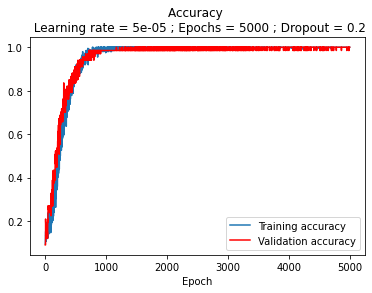

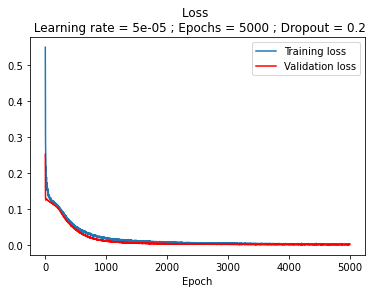

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(1)
plt.plot(acc, label="Training accuracy")
plt.plot(val_acc,color="red", label="Validation accuracy")
plt.legend(loc="lower right")
plt.title("Accuracy \n Learning rate = " + str(param.learningRate) + " ; Epochs = " + str(param.epochs) + " ; Dropout = " + str(param.dropout))
plt.xlabel("Epoch")
name = param.plot_saving_location + "plot_accuracy_lr_" + str(param.learningRate) + "_ep_" + str(param.epochs) + "_dr_" + str(param.dropout) + ".pdf"
name = name.replace(".", ",", 2) # replace the two first dots
plt.savefig(name, format="pdf")

plt.figure(2)
plt.plot(loss, label="Training loss")
plt.plot(val_loss,color="red", label="Validation loss")
plt.legend(loc="upper right")
plt.title("Loss \n Learning rate = " + str(param.learningRate) + " ; Epochs = " + str(param.epochs) + " ; Dropout = " + str(param.dropout))
plt.xlabel("Epoch")
name = param.plot_saving_location + "plot_loss_lr_" + str(param.learningRate) + "_ep_" + str(param.epochs) + "_dr_" + str(param.dropout) + ".pdf"
name = name.replace(".", ",", 2)
plt.savefig(name, format="pdf")

